In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

In [3]:
employee_ids=[f"Emp_{i:03d}" for i in range(1,31)]

In [4]:
dates=pd.date_range(start='2025-07-01', periods=30, freq='D')

In [5]:
date={
    "Date":np.tile(dates,len(employee_ids)),
    "Employee_IDS":np.repeat(employee_ids,len(dates)),
    "Working_hours":np.random.uniform(4, 10, size=len(dates)*len(employee_ids))
}                           

In [6]:
df=pd.DataFrame(date)

In [7]:
df

,Date,Employee_IDS,Working_hours
0,2025-07-01,Emp_001,6.247241
1,2025-07-02,Emp_001,9.704286
2,2025-07-03,Emp_001,8.391964
3,2025-07-04,Emp_001,7.591951
4,2025-07-05,Emp_001,4.936112
...,...,...,...
895,2025-07-26,Emp_030,5.229906
896,2025-07-27,Emp_030,5.758886
897,2025-07-28,Emp_030,9.378015
898,2025-07-29,Emp_030,4.078012


In [8]:
df["Working_hours"]=df["Working_hours"].round(1)
df

,Date,Employee_IDS,Working_hours
0,2025-07-01,Emp_001,6.2
1,2025-07-02,Emp_001,9.7
2,2025-07-03,Emp_001,8.4
3,2025-07-04,Emp_001,7.6
4,2025-07-05,Emp_001,4.9
...,...,...,...
895,2025-07-26,Emp_030,5.2
896,2025-07-27,Emp_030,5.8
897,2025-07-28,Emp_030,9.4
898,2025-07-29,Emp_030,4.1


In [9]:
df.to_csv("Employee_Working_hours.csv", index=False)

In [10]:
df_csv=pd.read_csv("Employee_Working_hours.csv")

In [11]:
df_csv

,Date,Employee_IDS,Working_hours
0,2025-07-01,Emp_001,6.2
1,2025-07-02,Emp_001,9.7
2,2025-07-03,Emp_001,8.4
3,2025-07-04,Emp_001,7.6
4,2025-07-05,Emp_001,4.9
...,...,...,...
895,2025-07-26,Emp_030,5.2
896,2025-07-27,Emp_030,5.8
897,2025-07-28,Emp_030,9.4
898,2025-07-29,Emp_030,4.1


In [12]:
print(df_csv.head())

         Date Employee_IDS  Working_hours
0  2025-07-01      Emp_001            6.2
1  2025-07-02      Emp_001            9.7
2  2025-07-03      Emp_001            8.4
3  2025-07-04      Emp_001            7.6
4  2025-07-05      Emp_001            4.9


In [13]:
print(df_csv.describe())

       Working_hours
count     900.000000
mean        6.953667
std         1.762739
min         4.000000
25%         5.400000
50%         7.000000
75%         8.500000
max        10.000000


In [14]:
print(df_csv["Employee_IDS"].unique())

['Emp_001' 'Emp_002' 'Emp_003' 'Emp_004' 'Emp_005' 'Emp_006' 'Emp_007'
 'Emp_008' 'Emp_009' 'Emp_010' 'Emp_011' 'Emp_012' 'Emp_013' 'Emp_014'
 'Emp_015' 'Emp_016' 'Emp_017' 'Emp_018' 'Emp_019' 'Emp_020' 'Emp_021'
 'Emp_022' 'Emp_023' 'Emp_024' 'Emp_025' 'Emp_026' 'Emp_027' 'Emp_028'
 'Emp_029' 'Emp_030']


In [20]:
total_hours=df_csv.groupby("Employee_IDS")["Working_hours"].sum().sort_values(ascending=False)

In [22]:
avg_daily=df_csv.groupby("Employee_IDS")["Working_hours"].mean()

In [23]:
threshold_low=5
threshold_high=9
df_csv["Low_Hour_Flag"] = df_csv["Working_hours"] < threshold_low
df_csv["High_Hour_Flag"] = df_csv["Working_hours"] > threshold_high

print(df_csv[df_csv["Low_Hour_Flag"] | df_csv["High_Hour_Flag"]].head())

         Date Employee_IDS  Working_hours  Low_Hour_Flag  High_Hour_Flag
1  2025-07-02      Emp_001            9.7          False            True
4  2025-07-05      Emp_001            4.9           True           False
5  2025-07-06      Emp_001            4.9           True           False
6  2025-07-07      Emp_001            4.3           True           False
7  2025-07-08      Emp_001            9.2          False            True


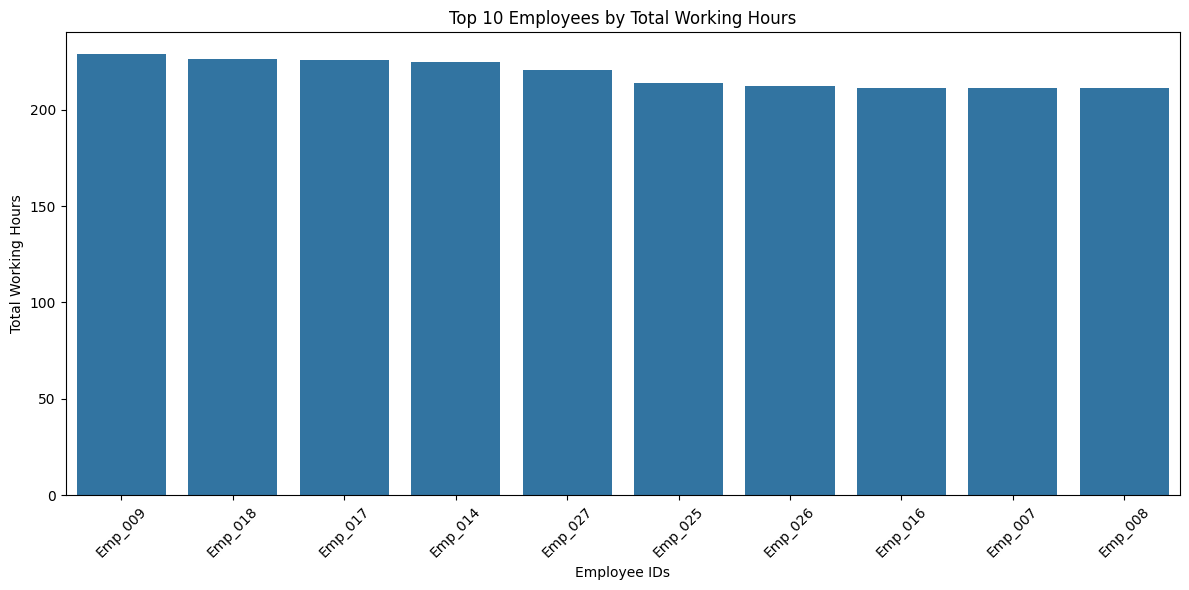

In [24]:
top10=total_hours.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Employees by Total Working Hours")
plt.xlabel("Employee IDs")  
plt.ylabel("Total Working Hours")
plt.tight_layout()
plt.show()

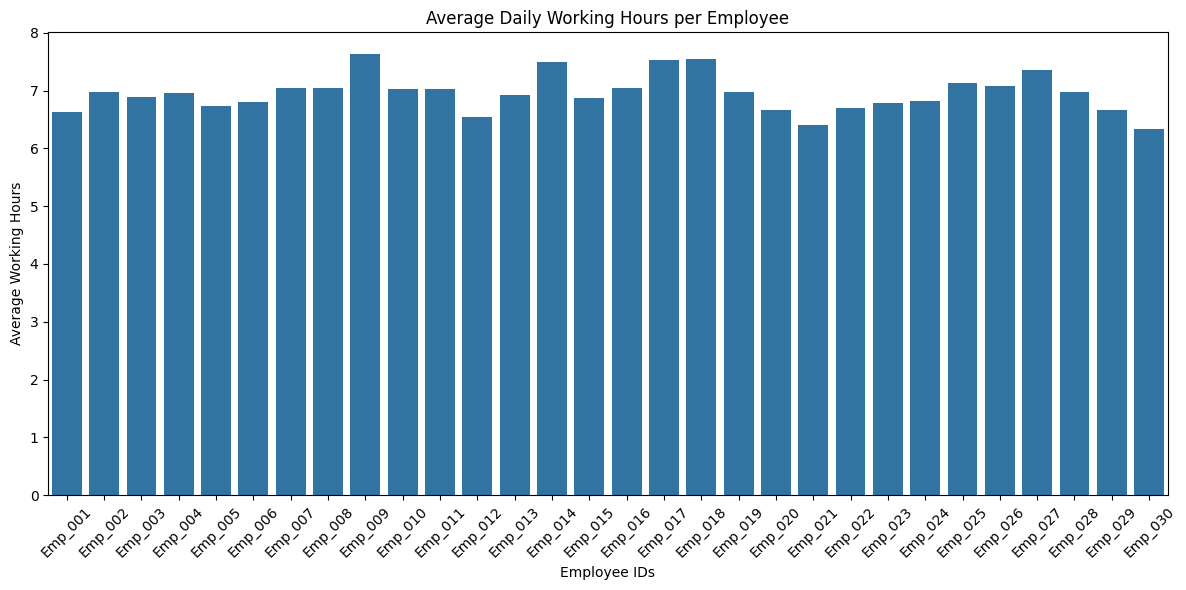

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_daily.index, y=avg_daily.values)
plt.xticks(rotation=45) 
plt.title("Average Daily Working Hours per Employee")   
plt.xlabel("Employee IDs")
plt.ylabel("Average Working Hours") 
plt.tight_layout()
plt.show()

In [6]:
import requests
from bs4 import BeautifulSoup

In [7]:
url = "http://books.toscrape.com"

In [8]:
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

books = soup.find_all('article', class_='product_pod')

In [9]:
book_data = []
books = soup.find_all('article', class_='product_pod')

for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    print(f"Title: {title}\nPrice: {price}\n")
    book_data.append({"Title": title, "Price":price})

Title: A Light in the Attic
Price: Â£51.77

Title: Tipping the Velvet
Price: Â£53.74

Title: Soumission
Price: Â£50.10

Title: Sharp Objects
Price: Â£47.82

Title: Sapiens: A Brief History of Humankind
Price: Â£54.23

Title: The Requiem Red
Price: Â£22.65

Title: The Dirty Little Secrets of Getting Your Dream Job
Price: Â£33.34

Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price: Â£17.93

Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price: Â£22.60

Title: The Black Maria
Price: Â£52.15

Title: Starving Hearts (Triangular Trade Trilogy, #1)
Price: Â£13.99

Title: Shakespeare's Sonnets
Price: Â£20.66

Title: Set Me Free
Price: Â£17.46

Title: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Price: Â£52.29

Title: Rip it Up and Start Again
Price: Â£35.02

Title: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Price: Â£57.25

Title: Olio
Price

In [10]:
df= pd.DataFrame(book_data)
df

,Title,Price
0,A Light in the Attic,Â£51.77
1,Tipping the Velvet,Â£53.74
2,Soumission,Â£50.10
3,Sharp Objects,Â£47.82
4,Sapiens: A Brief History of Humankind,Â£54.23
5,The Requiem Red,Â£22.65
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60
9,The Black Maria,Â£52.15


In [11]:
import os
import shutil

def organize_files(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            _, ext = os.path.splitext(filename)
            ext = ext[1:].upper()  # Remove '.' and capitalize
            if not ext:
                continue
            dest_folder = os.path.join(folder_path, ext)
            os.makedirs(dest_folder, exist_ok=True)
            shutil.move(file_path, os.path.join(dest_folder, filename))

# Change this to your actual downloads path
organize_files("C:/Users/senth/Downloads")